# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [4]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
forest_fires = fetch_ucirepo(id=162) 
  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  
# metadata 
print(forest_fires.metadata) 
  
# variable information 
print(forest_fires.variables) 


{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'title': 'A data mining approach to predict forest fires using meteorological data', 'authors': 'P. Cortez, A

In [6]:
import pandas as pd

# Define your column names if necessary
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]

# Load data from a URL
data_url = 'https://archive.ics.uci.edu/static/public/162/data.csv'
fires_dt = (pd.read_csv(data_url, header=None, names=columns, skiprows=1))
fires_dt



,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Get X and Y

Create the features data frame and target data.

In [7]:
X = fires_dt.drop('area',axis=1)
Y = fires_dt['area']

from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Sorting out the columns
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
cat_cols = ['month', 'day']

In [9]:
# preproc1
  
num_transforms = Pipeline(steps=[
    ('scaler', StandardScaler())
])
    
cat_transforms= Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error',drop=None))
])

    # preprocessing pipeline 1
preproc1 = ColumnTransformer(
    transformers=[
        ('num_transforms', num_transforms, num_cols), 
        ('cat_transforms', cat_transforms, cat_cols)   
    ]
)

preproc1

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [10]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
import numpy as np

rain_col = ['rain']
def binarize_rain(rain):
    return np.where(rain > 0, 1, 0).reshape(-1, 1)

# preproc2

    
num_transforms = Pipeline(steps=[
    ('scaler', StandardScaler()),
     ('transform', PowerTransformer())    
])
    
cat_transforms= Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error',drop=None)),
   
])

    # Rain transformation
rain_transform = Pipeline(steps=[
    ('binarize_rain', FunctionTransformer(binarize_rain, validate=True))
])
    # Create preprocessing pipeline #2
       
preproc2 = ColumnTransformer(
    transformers=[
        ('num_transforms', num_transforms, num_cols), 
        ('rain', rain_transform, rain_col),
        ('cat_transforms', cat_transforms, cat_cols),

    ]
)

preproc2

ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('transform',
                                                  PowerTransformer())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('rain',
                                 Pipeline(steps=[('binarize_rain',
                                                  FunctionTransformer(func=<function binarize_rain at 0x7f52c0fdca60>,
                                                                      validate=True))]),
                                 ['rain']),
                                ('cat_transforms',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [11]:
# Pipeline A considering preproc1 & baseline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
import sklearn.metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Set Pipeline
Pipeline_A = Pipeline(
    steps=[
        ('preprocessing',preproc1)
        ,('regressor',LinearRegression())
    ]
)

# Split Data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit to Pipeline
Pipeline_A.fit(X_train,Y_train)
# Set Scores
scoring = ['r2','neg_root_mean_squared_error']

# Cross-Validation
cv_results = cross_validate(Pipeline_A, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# DataFrame
res_simple = pd.DataFrame(cv_results).assign(experiment=1)
res_simple

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,experiment
0,0.019036,0.009754,-0.051824,0.060899,-44.160022,-48.210735,1
1,0.022434,0.015290,-0.260907,0.063364,-26.247083,-51.180599,1
2,0.008769,0.005419,-1.161384,0.067685,-31.031591,-51.307089,1
3,0.017283,0.029860,NaN,0.089396,NaN,-28.322627,1
4,0.009978,0.009155,NaN,0.059341,NaN,-51.036514,1


In [12]:
# Pipeline B
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate
import sklearn.metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

# Set Pipeline
Pipeline_B = Pipeline(
    steps=[
        ('preprocessing',preproc2)
        ,('regressor',LinearRegression())
    ]
)


# Split Data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit to Pipeline
Pipeline_B.fit(X_train,Y_train)
# Set Scores
scoring = ['r2','neg_root_mean_squared_error']

# Cross-Validation
cv_results = cross_validate(Pipeline_B, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# DataFrame
res_simple = pd.DataFrame(cv_results).assign(experiment=1)
res_simple

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,experiment
0,0.085080,0.032430,-0.030665,0.066165,-43.713596,-48.075350,1
1,0.058201,0.019478,-0.284561,0.073423,-26.492123,-50.905018,1
2,0.074769,0.018759,-0.510020,0.075273,-25.937575,-51.097853,1
3,0.063716,0.013538,NaN,0.103955,NaN,-28.095301,1
4,0.043799,0.014727,NaN,0.066989,NaN,-50.828609,1


In [13]:
# Pipeline C 

from sklearn.ensemble import RandomForestRegressor

# Set Pipeline
Pipeline_C = Pipeline(
    steps=[
        ('preprocessing', preproc1),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit to Pipeline
Pipeline_C.fit(X_train, Y_train)

# Set Scores
scoring = ['r2', 'neg_root_mean_squared_error']

# Cross-Validation
cv_results = cross_validate(Pipeline_C, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# DataFrame
res_rf = pd.DataFrame(cv_results).assign(experiment=1)
res_rf

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,experiment
0,0.291531,0.010993,-0.753027,0.795659,-57.010145,-22.488740,1
1,0.382769,0.025586,-1.312570,0.846151,-35.545683,-20.742824,1
2,0.289422,0.012164,-2.110199,0.846997,-37.224779,-20.784792,1
3,0.276041,0.010142,NaN,0.801266,NaN,-13.231383,1
4,0.263633,0.006562,NaN,0.811026,NaN,-22.875256,1


In [14]:
# Pipeline D 
from sklearn.ensemble import RandomForestRegressor

# Set Pipeline
Pipeline_D = Pipeline(
    steps=[
        ('preprocessing', preproc2),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Fit to Pipeline
Pipeline_D.fit(X_train, Y_train)

# Set Scores
scoring = ['r2', 'neg_root_mean_squared_error']

# Cross-Validation
cv_results = cross_validate(Pipeline_D, X_train, Y_train, cv=5, scoring=scoring, return_train_score=True)

# DataFrame
res_rf = pd.DataFrame(cv_results).assign(experiment=1)
res_rf

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,experiment
0,0.335845,0.015744,-0.842136,0.799648,-58.441148,-22.268154,1
1,0.330233,0.015132,-1.537223,0.847118,-37.232208,-20.677495,1
2,0.338504,0.016081,-1.854276,0.839743,-35.660383,-21.271816,1
3,0.287288,0.013768,NaN,0.799918,NaN,-13.276161,1
4,0.289260,0.012579,NaN,0.814261,NaN,-22.678643,1


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [16]:
from sklearn.model_selection import GridSearchCV

# Assuming Pipeline_A and param_grid are defined earlier in my code

# Define your GridSearchCV object
pipe_a_grid_cv = GridSearchCV(
    estimator=Pipeline_A,
    param_grid=param_grid,
    refit='neg_root_mean_squared_error'  # Assuming you're using this for refitting
)

# Fit GridSearchCV
pipe_a_grid_cv.fit(X_train, Y_train)

# Now you can print the best parameters and best score
print(pipe_a_grid_cv.best_params_)
print(pipe_a_grid_cv.best_score_)


{'regressor__fit_intercept': True, 'regressor__positive': True}
nan


In [19]:
from sklearn.model_selection import GridSearchCV

# Assuming Pipeline_B and param_grid are defined earlier in my code

# Define your GridSearchCV object
pipe_b_grid_cv = GridSearchCV(
    estimator=Pipeline_B,
    param_grid=param_grid,
    refit='neg_root_mean_squared_error'  # Adjust based on your refit metric
)

# Fit GridSearchCV
pipe_b_grid_cv.fit(X_train, Y_train)

# Now you can print the best parameters and best score
print(pipe_b_grid_cv.best_params_)
print(pipe_b_grid_cv.best_score_)


{'regressor__fit_intercept': True, 'regressor__positive': True}
nan


In [21]:
# Assuming Pipeline_C and param_grid are defined earlier in my code
Pipeline_C.get_params()

# Set Grid
param_grid = {
    'regressor__n_estimators': [50, 100, 150, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10, 15],
    'regressor__max_features': ['sqrt', 'log2', None, 0.5] 
}

scoring = ['r2','neg_root_mean_squared_error']

# Grid Search
grid_cv = GridSearchCV(
    estimator=Pipeline_C,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    refit='neg_root_mean_squared_error'
)

# Fit GridSearchCV
pipe_c_gridcv = grid_cv.fit(X_train, Y_train)

print(pipe_c_gridcv.best_params_)
print(pipe_c_gridcv.best_score_)

{'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
nan


In [22]:
# Assuming Pipeline_D and param_grid are defined earlier in my code
param_grid = {
    'regressor__n_estimators': [50, 100, 150, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10, 15],
    'regressor__max_features': ['sqrt', 'log2', None, 0.5] 
}
scoring = ['r2','neg_root_mean_squared_error']

# Grid Search
grid_cv = GridSearchCV(
    estimator=Pipeline_D,
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    refit='neg_root_mean_squared_error'
)

# Fit GridSearchCV
pipe_d_gridcv = grid_cv.fit(X_train, Y_train)

print(pipe_d_gridcv.best_params_)
print(pipe_d_gridcv.best_score_)

{'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
nan


# Evaluate

+ Which model has the best performance?

Pipeline C

# Export

+ Save the best performing model to a pickle file.

In [23]:
pipe_c_gridcv.best_estimator_


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['month', 'day'])])),
                ('regressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=50,
                                       random_state=42))])

In [24]:
import pickle
best_model = pipe_c_gridcv.best_estimator_

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

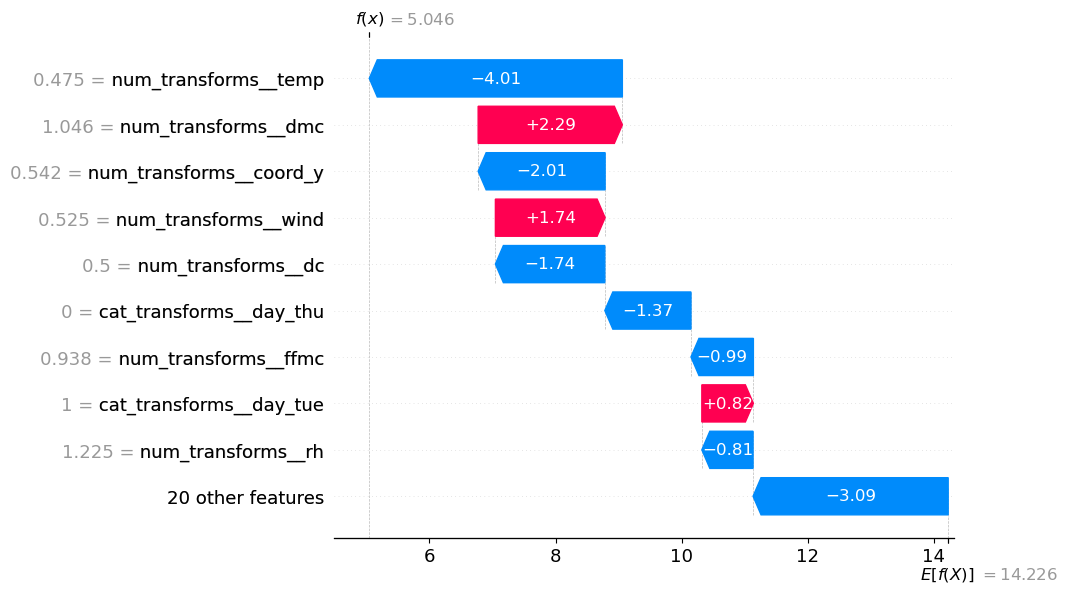

In [26]:
import shap
data_transform = best_model.named_steps['preprocessing'].transform(X_test)

explainer = shap.Explainer(
    best_model.named_steps['regressor'], 
    data_transform, 
    feature_names=best_model.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform,check_additivity=False)


shap.plots.waterfall(shap_values[1])

According to the data evaluated, the temperature demonstrates the highest explanatory power, followed by the DMC index among the features.

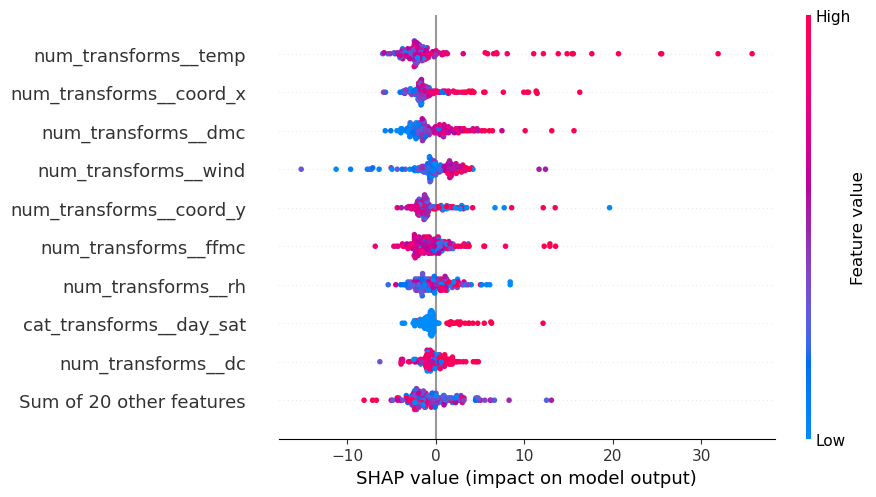

In [27]:
shap.plots.beeswarm(shap_values)

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.